<a href="https://colab.research.google.com/github/XUE985/CV_EMSSE/blob/main/Tirana_CV_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision - Tirana May 2025 **

Final Evaluation Exercise: Complete the following exercises

1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

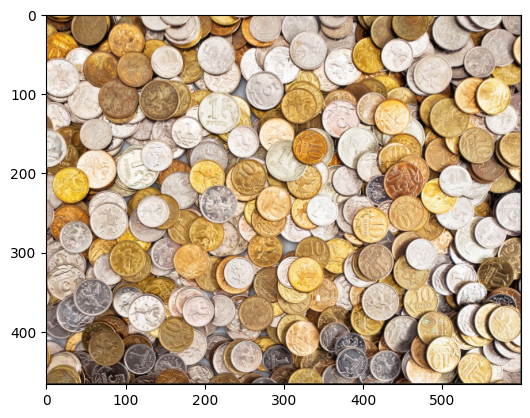

In [3]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage.filters import threshold_otsu
from skimage.measure import label

# 1. read RGB image
I = sk.io.imread('/content/coins.png')
plt.imshow(I)

In [4]:
print(I.shape)

(467, 600, 4)


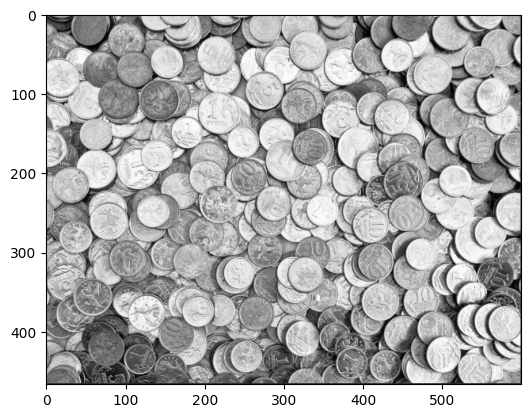

In [5]:
I_rgb = I[:, :, :3]
IG = sk.color.rgb2gray(I_rgb) # Convert RGB image to grayscale

# Display the grayscale image
plt.imshow(IG,cmap='gray')

2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

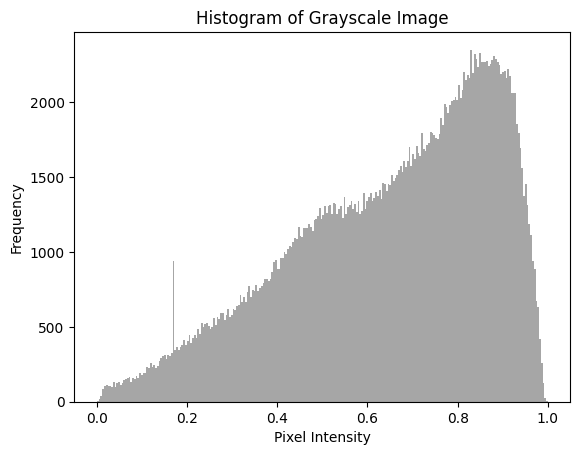

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the grayscale image to get pixel intensity values
hist_values = IG.flatten()

# Plot the histogram
plt.hist(hist_values, bins=256, range=(0,1), color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show()

The peaks indicate the most common pixel intensity values in the image

3. Applied noise to the image and use the correct function to erase the noise.

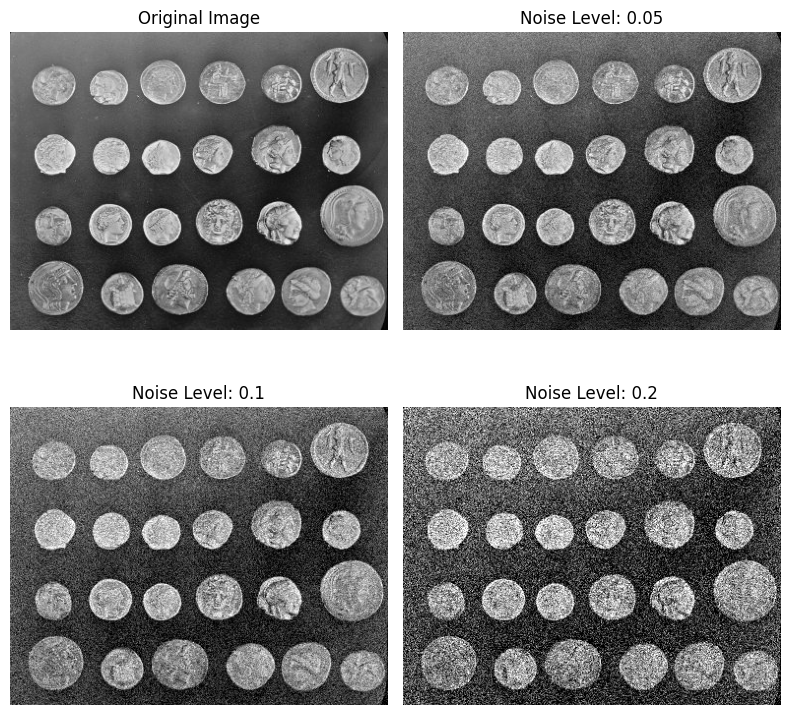

In [9]:
noise_type = 'gaussian'  # Select your desired noise type
noise_levels = [0.05, 0.1, 0.2]  # Adjust intensity levels as needed

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, noise_level in enumerate(noise_levels):
    # Add noise to the image using the specified mode
    if noise_type == 's&p':
        noisy_image = random_noise(coins, mode=noise_type, amount=noise_level)
    else:
        noisy_image = random_noise(coins, mode=noise_type, var=noise_level**2)

    # Updated row and column calculation
    row = (i + 1) // 2
    col = (i + 1) % 2

    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Noise Level: {noise_level}')
    axes[row, col].axis('off')

plt.tight_layout()

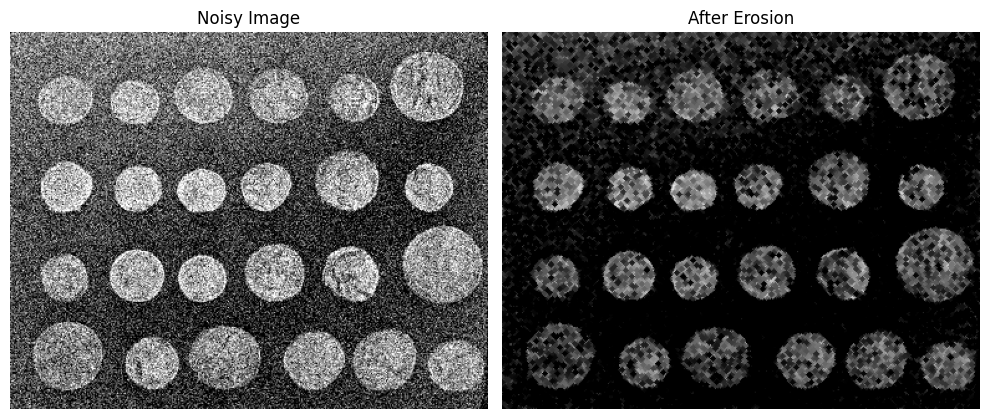

In [13]:
from skimage.morphology import erosion, disk
import matplotlib.pyplot as plt

footprint = disk(2)
eroded_image = erosion(noisy_image, footprint)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title("Noisy Image")
axes[0].axis("off")

axes[1].imshow(eroded_image, cmap='gray')
axes[1].set_title("After Erosion")
axes[1].axis("off")

plt.tight_layout()
plt.show()

4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

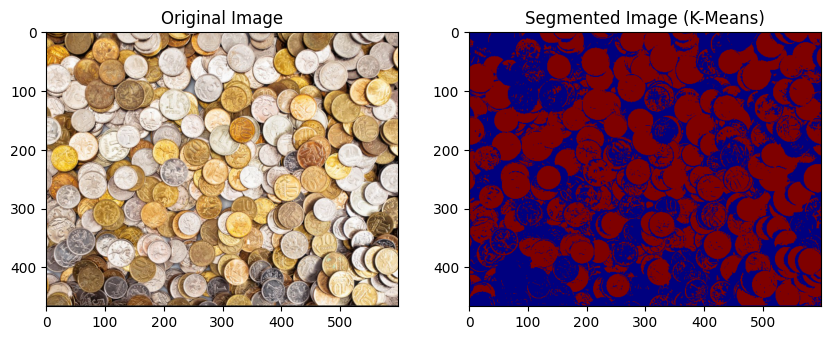

In [17]:
import numpy as np
from sklearn.cluster import KMeans

# Load the image
image = sk.io.imread('/content/coins.png')

# Convert the image to a 2D array
image_2D = image.reshape((-1, image.shape[-1]))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented Image (K-Means)')
plt.show()


5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

0.6026567647058824
number of regions is 1126


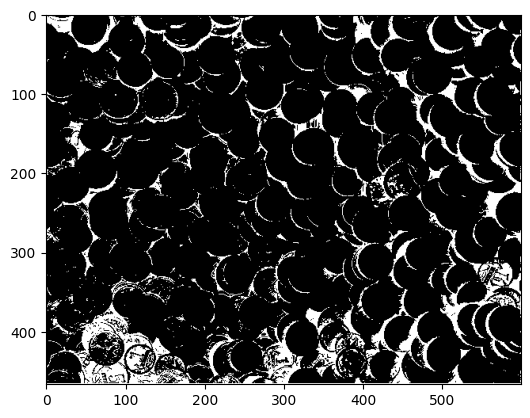

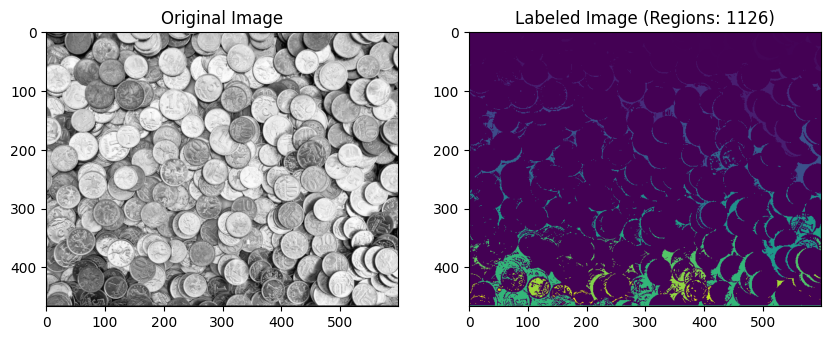

In [28]:
from skimage import exposure

IGC = exposure.adjust_gamma(IG, 0.5)
plt.imshow(IGC,cmap='gray')
thresh = threshold_otsu(IG)
print(thresh)

bw = IGC < thresh # keep lighter regions with grayscale intensities above threshold
plt.imshow(bw,cmap='gray')

label_image, nregions = label(bw,return_num=True)

ig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(IG, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(label_image, cmap="jet")
axes[1].set_title(f"Labeled Image (Regions: {nregions})")

plt.imshow(label_image)
print('number of regions is {}'.format(nregions))

plt.show()

6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

Average Area: 31.68
Average Major Axis Length: 7.03
Average Orientation: -0.18 radians


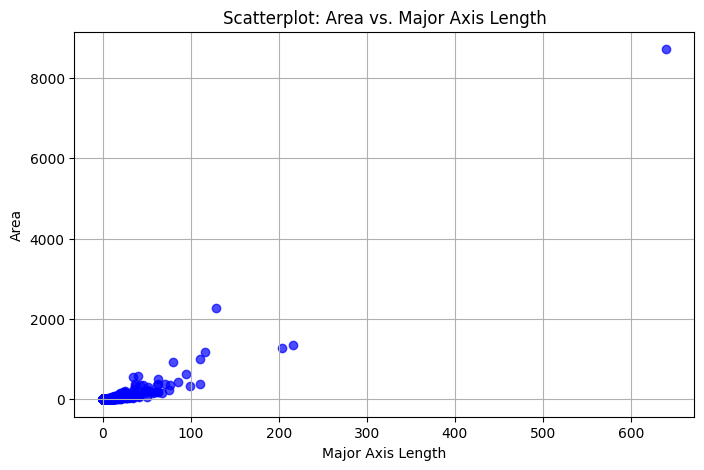

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import regionprops

# Compute region properties
regions = regionprops(label_image)

# Extract features
areas = [region.area for region in regions]
major_axes = [region.major_axis_length for region in regions]
orientations = [region.orientation for region in regions]

# Compute average values
avg_area = np.mean(areas)
avg_major_axis = np.mean(major_axes)
avg_orientation = np.mean(orientations)

print(f"Average Area: {avg_area:.2f}")
print(f"Average Major Axis Length: {avg_major_axis:.2f}")
print(f"Average Orientation: {avg_orientation:.2f} radians")

# Scatterplot of Area vs. Major Axis Length
plt.figure(figsize=(8, 5))
plt.scatter(major_axes, areas, color='blue', alpha=0.7)
plt.xlabel("Major Axis Length")
plt.ylabel("Area")
plt.title("Scatterplot: Area vs. Major Axis Length")
plt.grid(True)
plt.show()

7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [31]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity'])

df_features = pd.DataFrame(props)
df_features.head()

label    area  eccentricity
0      1  1004.0      0.907610
1      2     2.0      1.000000
2      3  1276.0      0.970693
3      4     5.0      0.971792
4      5    42.0      0.971623

<Axes: xlabel='area', ylabel='eccentricity'>

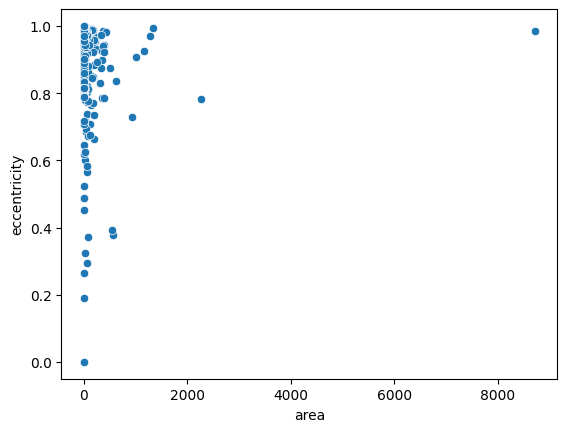

In [32]:
import seaborn as sns

sns.scatterplot(x='area',y='eccentricity',data=df_features)

Find coins as objects with area higher than 1750 and eccentricity lower than 1.5

In [35]:
df_coins = df_features.loc[(df_features['area']>1750) & (df_features['eccentricity']<1.5)]

df_coins.head()
print('number of idenfitied coins is {}'.format(df_coins.shape[0]))

number of idenfitied coins is 2


8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

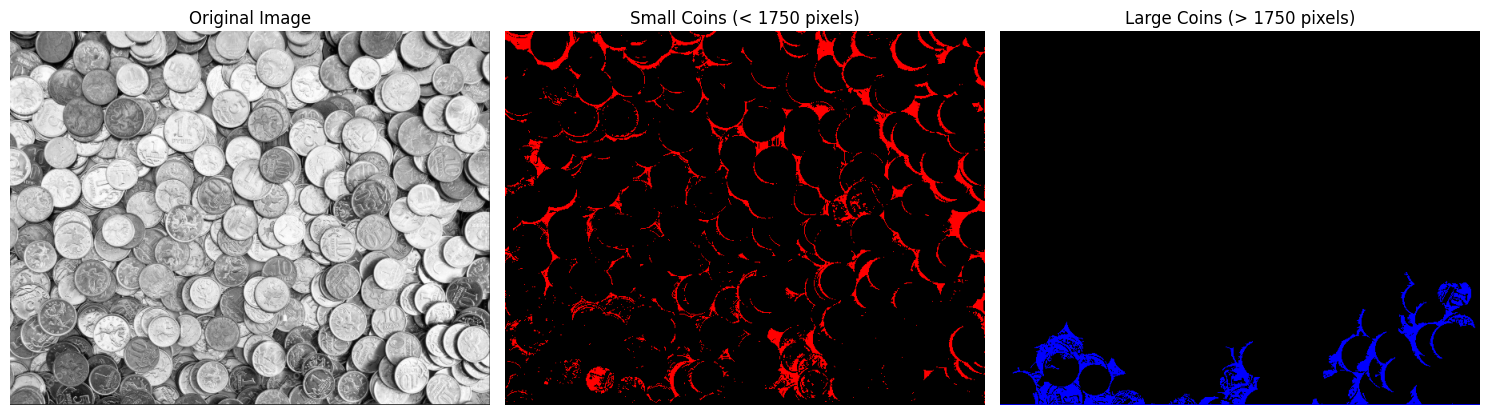

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb

size_threshold = 1750

# Create masks for small and large coins
small_coins = np.isin(label_image, [region.label for region in regionprops(label_image) if region.area < size_threshold])
large_coins = np.isin(label_image, [region.label for region in regionprops(label_image) if region.area > size_threshold])

# Apply color coding
small_coins_colored = label2rgb(small_coins, bg_label=0, colors=['red'])
large_coins_colored = label2rgb(large_coins, bg_label=0, colors=['blue'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].imshow(IG, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Small coins (< 1750)
axes[1].imshow(small_coins_colored)
axes[1].set_title("Small Coins (< 1750 pixels)")
axes[1].axis("off")

# Large coins (> 1750)
axes[2].imshow(large_coins_colored)
axes[2].set_title("Large Coins (> 1750 pixels)")
axes[2].axis("off")

plt.tight_layout()
plt.show()

9. Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

Does not require labels. Groups pixels based on similarity (color, texture, etc.). Examples: K-Means, GMM. Advantages: Simple, does not require labeled data. Disadvantages: Less accurate, parameter choice can be crucial.
1. Preprocessing the Image
2. Apply an Unsupervised Clustering Algorithm
3. Visualization

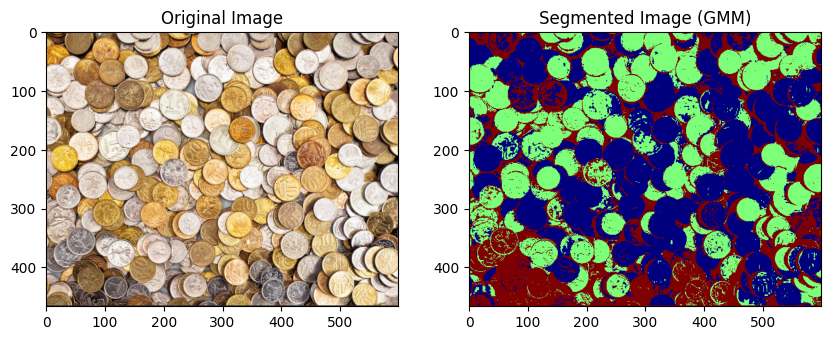

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import io

# Load the image
image = io.imread('/content/coins.png')

# Convert the image to a 2D array
image_2D = image.reshape((-1, image.shape[-1]))

# Apply Gaussian Mixture Model (GMM) with 3 components (clusters)
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(image_2D)

# Get pixel labels (most likely cluster assignments)
segmented_image = gmm.predict(image_2D).reshape(image.shape[:2])

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')

axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented Image (GMM)')

plt.show()

1. K-Means assigns each pixel to the nearest cluster center using distance metrics.

2. GMM models pixel distributions as a mixture of Gaussians,meaning each pixel has a probability of belonging to multiple clusters.

10. Extract the main texture features of this image

In [43]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops

image = np.array([[0, 0, 1, 1], [0, 0, 1, 1], [0, 2, 2, 2], [2, 2, 3, 3]], dtype=np.uint8)

g = graycomatrix(image, [1], [0], levels=4, normed=False, symmetric=False)

# Extract texture properties (e.g., contrast)
contrast = graycoprops(g, 'contrast')[0, 0]

print(f"Contrast: {contrast}")

Contrast: 0.5833333333333333


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

# Suponiendo que tienes:
# - `IG`: imagen en escala de grises normalizada (float o uint8)
# - `label_image`: imagen segmentada (mismo tamaño que IG)

props = regionprops(label_image, intensity_image=IG)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = IG[minr:maxr, minc:maxc]

    # Convertir a uint8 y escalar valores si es necesario
    Iu8 = img_as_ubyte(I)

    # Calcular GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extraer características
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

# Exportar a Excel
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df.to_excel("/content/images.xlsx", index=False)
df

Contrast  Dissimilarity  Homogeneity    Energy  Correlation
0      566.680741      15.344124     0.102606  0.018027     0.894329
1        0.000000       0.000000     0.000000  0.000000     1.000000
2      557.258482      14.978257     0.102421  0.014003     0.915048
3     1316.333333      32.111111     0.023642  0.235702     0.586557
4     1149.510417      22.947917     0.079139  0.074024     0.861155
...           ...            ...          ...       ...          ...
1121     0.000000       0.000000     0.000000  0.000000     1.000000
1122     4.000000       2.000000     0.200000  0.707107    -1.000000
1123     0.000000       0.000000     0.000000  0.000000     1.000000
1124     0.000000       0.000000     0.000000  0.000000     1.000000
1125     0.000000       0.000000     0.000000  0.000000     1.000000

[1126 rows x 5 columns]

**Personal discussion:**
the course is much more interesting than I expected. Instead of repeating code, the professor shows us a lot ongoing cases and current utilization of computer vision in real life, which motivate my learning.I could feel the professor love this course and the area he is working on,all these make the classes attractive and lead me to explore more about computer vision.